In [27]:
from eye_contact_frames import eye_contact_frames 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [53]:
def merge_annotations_real(number_annotation, total_frames):
    df_annotated = pd.Series(eye_contact_frames(f"annotations/annotations_{number_annotation}.xml", total_frames), name = "annotated")
    df = pd.read_csv(f"video_annot{number_annotation}_crop_output_mediapipe.txt", names = ["frame", "acc"])
    print(df_annotated.value_counts())
    merged = pd.merge(df, df_annotated, left_on = "frame", right_index=True)
    return merged

In [57]:
def view(threshold, annotations, real):
    real_rounded = [x>threshold for x in real]
    print(threshold, accuracy_score(annotations, real_rounded), balanced_accuracy_score(annotations, real_rounded))
    ConfusionMatrixDisplay(confusion_matrix(annotations, real_rounded)).plot();

In [54]:
merged = merge_annotations_real(3, 17000)

# classification_report(merged.annotated, [x>threshold for x in merged.acc])

annotated
0.0    13960
1.0     3040
Name: count, dtype: int64


In [47]:
for i in np.arange(.2,1,.05):
    print(f"Threshold {round(i,2)} : accuracy score {round(accuracy_score([x>i for x in merged.acc], merged.annotated),3)} and balanced accuracy score {round(balanced_accuracy_score([x>i for x in merged.acc], merged.annotated),3)}")

Threshold 0.2 : accuracy score 0.712 and balanced accuracy score 0.614
Threshold 0.25 : accuracy score 0.633 and balanced accuracy score 0.577
Threshold 0.3 : accuracy score 0.549 and balanced accuracy score 0.553
Threshold 0.35 : accuracy score 0.464 and balanced accuracy score 0.528
Threshold 0.4 : accuracy score 0.411 and balanced accuracy score 0.523
Threshold 0.45 : accuracy score 0.349 and balanced accuracy score 0.507
Threshold 0.5 : accuracy score 0.297 and balanced accuracy score 0.496
Threshold 0.55 : accuracy score 0.261 and balanced accuracy score 0.494
Threshold 0.6 : accuracy score 0.24 and balanced accuracy score 0.486
Threshold 0.65 : accuracy score 0.222 and balanced accuracy score 0.477
Threshold 0.7 : accuracy score 0.215 and balanced accuracy score 0.51
Threshold 0.75 : accuracy score 0.208 and balanced accuracy score 0.565
Threshold 0.8 : accuracy score 0.193 and balanced accuracy score 0.521
Threshold 0.85 : accuracy score 0.19 and balanced accuracy score 0.593
Th

c:\Users\jojom\miniconda3\envs\condaAP\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\jojom\miniconda3\envs\condaAP\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


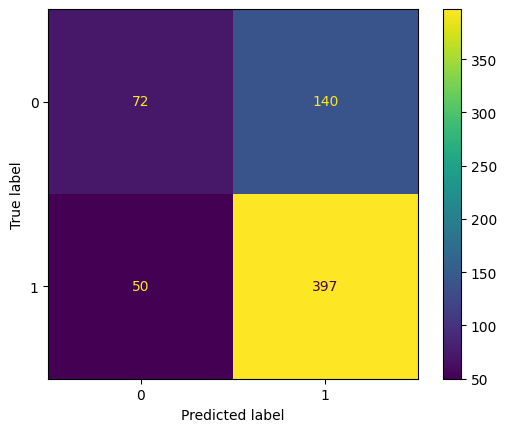

In [48]:
ConfusionMatrixDisplay(confusion_matrix([x>.2 for x in merged.acc], merged.annotated)).plot();

In [56]:
print(classification_report(merged.annotated, [x>.2 for x in merged.acc]))

              precision    recall  f1-score   support

         0.0       0.34      0.59      0.43       122
         1.0       0.89      0.74      0.81       537

    accuracy                           0.71       659
   macro avg       0.61      0.66      0.62       659
weighted avg       0.79      0.71      0.74       659



# Test